## **Closed-form Linear Regression**

Let's start by generating some random linear data

In [1]:
# vamos começar importando a lib numpy, apelidada de np (isso eu já cansada de saber, mas n custa nada deixar tudo bonitinho aqui)
import numpy as np

# Se você deseja que alguém seja capaz de reproduzir seus projetos, você pode definir a semente. Enquanto esta célula for executada, será
# a mesma matriz gerada
np.random.seed(7)

# aqui EU VOU CRIAR UMA MATRIZ ALEATÓRIA (random) ENTRE ZERO E UM(rand), COM 200 LINHAS E 1 COLUNA. TAL MATRIZ SERÁ MULTIPLICADA POR 4. 
# np.random.rand(linhas, colunas)
X = 4*np.random.rand(200, 1)
# aqui eu vou criar o mesmo caso da linha anterior, mas com diferenças: primeiro eu vou somar esta matriz ao tripo de X e depois somar com
# 2 
# aqui é nossa previsão que iremos utilizar na parte de regressão linear
y = 2 + 3*X + np.random.randn(200, 1)



Let's see what our data looks like


Text(0, 0.5, 'y')

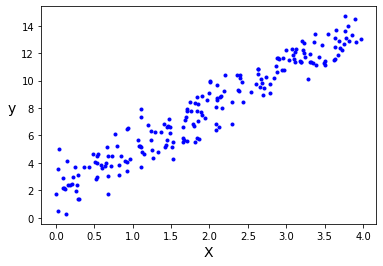

In [2]:
# importando a lib matplot
import matplotlib.pyplot as plt

# vou plotar o X e o y aqui como azul ('b')
plt.plot(X, y, 'b.')
# quero colocar rótulo no eixo x. 
#plt.xlabel("nome da label que quero", fontsize=tamanho da letra)
plt.xlabel("X", fontsize=14)
# quero colocar rótulo no eixo y
# plt.ylabel("y", rotation=0 para que o y fique de pé (lembrando que essa rotação aqui gira no sentido anti-horário e que o 0 é a letra
# em pé, no normal, fontsize=tamanho da fonte que quero para a letra do rótulo, labelpad=espaçamento (em forma numérica, óbvio) do label
# da caixa do plot) )
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

Now, let's see how well the Linear Regression models we saw fit this data.
We will start off building a Linear Regressor that uses the **Normal Equation** 

$\hat{\theta} = (X^TX)^{-1}X^Ty$

to find the best parameters.

In [3]:
# First we will add x0 = 1 to each instance

Xb = np.c_[np.ones(X.shape), X]

# Now we compute the model parameters - Computa o inverso do array dada.
theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)
theta

array([[2.01777976],
       [2.97603138]])

That is a pretty good estimate! The function we used to generate our data was $y = 2 + 3x + noise$. The predicted function is $\hat{y} \approx 2.01 + 2.97x$. Not bad!

Text(0, 0.5, 'y')

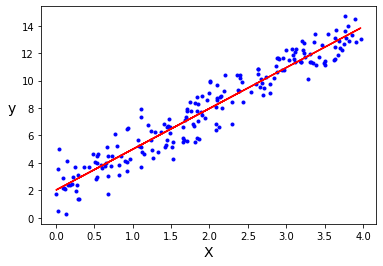

In [4]:
y_pred = Xb.dot(theta)

#plotar o x e o y em azul
plt.plot(X, y, 'b.')
#plotar o x e a previsão de y em vermelho
plt.plot(X, y_pred, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

Now let's perform the regression with scikit-learn.

In [5]:
# começar, obviamente, importando a lib
from sklearn.linear_model import LinearRegression

#armazenar a função dentro LR
LR = LinearRegression()
#COMEÇAR O TREINO
LR.fit(X, y)

LR.intercept_, LR.coef_

(array([2.01777976]), array([[2.97603138]]))

Note that the solution is exactly the same. This happens because sklearn finds the best parameters solving the following equation

$\hat{\theta} = X^+ \theta$,

where $X^+$ is the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of $X$. Evaluating the pseudinverse $X$ is more efficient than evaluating the inverse of $X^TX$. Besides, the pseuinverse is always defined while $X^TX$ might not be invertible.

## **Linear Regression with Gradient-Descent**


To perform Linear Regression with Gradient-Descent we will use sklearn's SGDRegressor.

In [6]:
# IMPORTANDO A LIB 
from sklearn.linear_model import SGDRegressor

#DENTRO DE SGD EU VOU ARMAZENAR A FUNÇÃO QUE TERÁ 1000 ITERAÇÕES, TOLERÂNICA DE 10 A -6, NÃO TEM PENALIDADE E 
SGD = SGDRegressor(max_iter=1000, tol=1e-6, eta0=0.01, penalty=None, random_state=7)
SGD.fit(X, np.ravel(y))

y_pred_SGD = SGD.predict(X)

SGD.intercept_, SGD.coef_

(array([1.93831671]), array([2.99402094]))

## **Ridge and Lasso Regression**

First we will perform **Ridge Regression** using the closed-form solution.

In [7]:
from sklearn.linear_model import Ridge

RidgeLR = Ridge(solver='cholesky', alpha=0.01, random_state=7)
RidgeLR.fit(X, y)

y_pred_RidgeLR = RidgeLR.predict(X)

RidgeLR.intercept_, RidgeLR.coef_

(array([2.01800544]), array([[2.97591609]]))

Now using SGDRegressor.

In [8]:
RidgeSGD = SGDRegressor(max_iter=1000, tol=1e-6, eta0=0.01, penalty='l2', alpha=0.01, random_state=7)
RidgeSGD.fit(X, np.ravel(y))

y_pred_RidgeSGD = RidgeSGD.predict(X)

RidgeSGD.intercept_, RidgeSGD.coef_

(array([1.97810841]), array([2.97261566]))

**Lasso Regression**

In [9]:
LassoSGD = SGDRegressor(max_iter=10000, tol=1e-6, eta0=0.01, penalty='l1', alpha=0.01, random_state=7)
LassoSGD.fit(X, np.ravel(y))

y_pred_LassoSGD = LassoSGD.predict(X)

LassoSGD.intercept_, LassoSGD.coef_

(array([1.95152839]), array([2.98689907]))

## **Comparison**

Text(0.5, 1.0, 'SGD Lasso Regression')

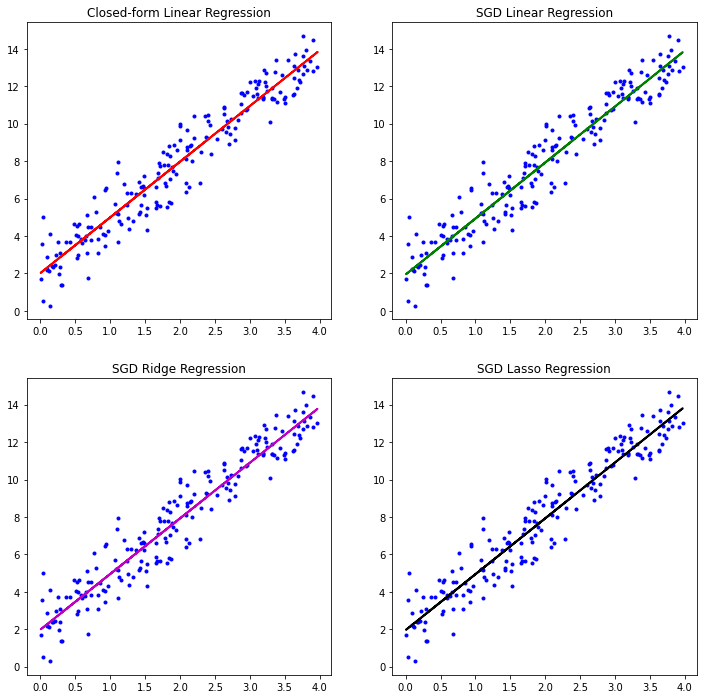

In [10]:
fig, axs = plt.subplots(2,2, figsize=(12,12))

for i in range(2):
  for j in range(2):
    axs[i, j].plot(X, y, 'b.')

axs[0, 0].plot(X, y_pred, 'r-', linewidth=2)
axs[0, 0].set_title("Closed-form Linear Regression")

axs[0, 1].plot(X, y_pred_SGD, 'g-', linewidth=2)
axs[0, 1].set_title("SGD Linear Regression")

axs[1, 0].plot(X, y_pred_RidgeSGD, 'm-', linewidth=2)
axs[1, 0].set_title("SGD Ridge Regression")

axs[1, 1].plot(X, y_pred_LassoSGD, 'k-', linewidth=2)
axs[1, 1].set_title("SGD Lasso Regression")

A common metric used to measure the performance of a regression model is the [r-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination). It provides a measure of how well observed outcomes are replicated by the model.

In [11]:
# CONTINUAR AQUI - 23/01/2022
# a métrica está dentro do sklearn, depois só ir printando os meus tipos de modelo de regressão
from sklearn.metrics import r2_score

print('Regression Model \t R2')
print('C-F Linear Regression: \t %2.4f'% r2_score(y, y_pred))
print('SGD Linear Regression: \t %2.4f'% r2_score(y, y_pred_SGD))
print('SGD Ridge Regression: \t %2.4f' % r2_score(y, y_pred_RidgeSGD))
print('SGD Lasso Regression: \t %2.4f' % r2_score(y, y_pred_LassoSGD))

Regression Model 	 R2
C-F Linear Regression: 	 0.9221
SGD Linear Regression: 	 0.9220
SGD Ridge Regression: 	 0.9220
SGD Lasso Regression: 	 0.9220


## **Polynomial Regression**

Finally, let's see how to perform **Polynomial Regression** with scikit-learn.

First we will generate some nonlinear data.

Text(0, 0.5, 'y')

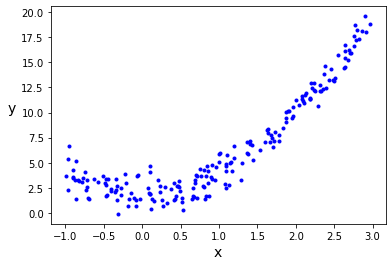

In [12]:
# criar a semente
np.random.seed(7)

# criar os dados 
X2 = 4*np.random.rand(200, 1) - 1
y2 = 2 + 2*X2**2 + np.random.randn(200, 1)

#plotar os dados
plt.plot(X2, y2, 'b.')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

Let's see how well a line fit this data.

Text(0, 0.5, 'y')

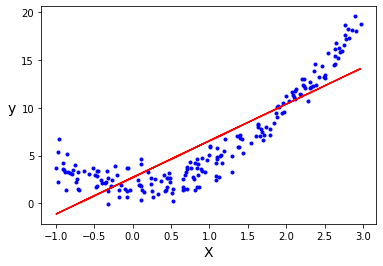

In [13]:
LR = LinearRegression()
LR.fit(X2, y2)

y2_pred = LR.predict(X2)

plt.plot(X2, y2, 'b.')
plt.plot(X2, y2_pred, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

The fit is not great, right? But that is expected, we have variables with a nonlinear relationship and we tried to represent that relationship as something linear.

Let's now build a Polynomial regression model for that data. First, we will make a second-degree polynomial transformation to our features (in this example we only have one feature, $x$).


**Remark:** Be careful with the degree of the transformation. If your data has many features, a high degree transformation will generate A LOT of new features. A high degree transformation can also cause overfitting.

In [14]:
# modelo de regressão polinomial
from sklearn.preprocessing import PolynomialFeatures

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
#train
Xp = polyFeatures.fit_transform(X2)

print(X2.shape, Xp.shape)

(200, 1) (200, 2)


Note that the transformed data has two features ($x$ and $x^2$), while the original data had only one ($x$). With this transformation, we mapped the original data into a higher dimensional space (in this case, from 2d to 3d).

In this higher dimensional space, we expect to be able to represent the relationship between the features ($x$ and $x^2$) and the target ($y$) as something linear (a plane). Therefore, we will model that relationship using Linear regression.

The idea for more complex problems (more features) is the same. First, we transform the original data using a polynomial transformation, which maps the data to a higher dimensional space. Then, we perform Linear regression with the transformed data.

Let's see how this transformed data looks in 3d.

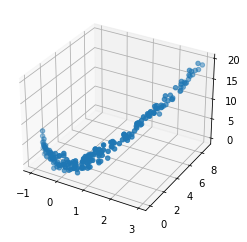

In [21]:
#plot em 3D
from mpl_toolkits.mplot3d import Axes3D

# o que vai diferenciar de plotar em 2d é só a adição do gca()
plt3d = plt.figure().gca(projection='3d')
# largura, altura e comprimento (não está na mesma ordem)
plt3d.scatter(Xp[:,0], Xp[:,1], y2.ravel())

Perfoming linear regression for the transformed data:

In [22]:
PR = LinearRegression()
PR.fit(Xp, y2)

PR.intercept_, PR.coef_

(array([2.00116874]), array([[0.01558909, 1.97950862]]))

Note that the linear surface the model found is a plane, as our transformed data has two features. Let's see this plane.

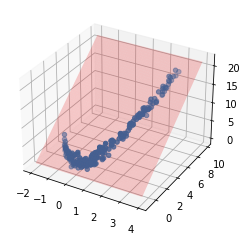

In [23]:
# import lib
from mpl_toolkits.mplot3d import Axes3D

theta0 = PR.intercept_
theta1 = PR.coef_[0,0]
theta2 = PR.coef_[0,1]

min1, max1 = Xp[:, 0].min()-1, Xp[:, 0].max()+1
min2, max2 = Xp[:, 1].min()-1, Xp[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.01)
x2grid = np.arange(min2, max2, 0.01)

xx, yy = np.meshgrid(x1grid, x2grid)

yhat = theta0 + theta1*xx + theta2*yy

plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, yhat, alpha=0.2, color='r')
plt3d.scatter(Xp[:,0], Xp[:,1], y2.ravel())

# plt3d.view_init(0, 0) # you can use this code to rotate the figure

Now let's see how the "best adjusted surface" looks like in the original data space:

Text(0, 0.5, 'y')

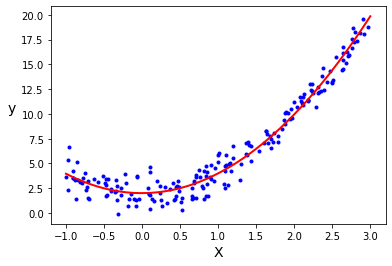

In [24]:
Xn = np.linspace(-1, 3, 200).reshape(200, 1)
Xnp = polyFeatures.transform(Xn)
y2_pred_PR = PR.predict(Xnp)

plt.plot(X2, y2, 'b.')
plt.plot(Xn, y2_pred_PR, 'r-', linewidth=2)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

It does not look linear! By mapping our data into a higher dimensional space, we were able to find a nonlinear relationship between the features and the target variable (in the original data space) even though we used Linear regression! Cool, right?